# Multiclass Product Sentiment Analysis 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Data Preparation

### Loading the dataset

In [2]:
df = pd.read_csv('../data/sentiment_analysis_1.csv')

### Data Cleaning

In [3]:
def clean_text(text):
    return re.sub(r'[^a-zA-z\s]','',text.lower().strip())

In [4]:
df['cleaned_text'] = df['text'].apply(clean_text)

### Tokenizing input

In [5]:
tokenizer = Tokenizer(num_words=10000,oov_token="<oov>")
tokenizer.fit_on_texts(df["cleaned_text"])
X = pad_sequences(tokenizer.texts_to_sequences(df["cleaned_text"]),maxlen=200)

### Data Preprocessing

In [6]:
df["encoded_label"] = LabelEncoder().fit_transform(df["label"])
y = to_categorical(df["encoded_label"],num_classes=3)

### Spliting the data

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

## Model Creation

### Model Loading

In [27]:
model = Sequential([
    Embedding(10000,128,input_length=200),
    SimpleRNN(64),
    Dense(64,activation='relu'),
    Dense(3,activation='softmax')
])

### Model Compilation

In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Model Training

In [29]:
history = model.fit(X_train,y_train,
                     epochs=30,
                     batch_size=32,
                     validation_split=0.1,
                     verbose=1
                     )

Epoch 1/30
3/3 [==============================] - 2s 197ms/step - loss: 1.1190 - accuracy: 0.3067 - val_loss: 1.2532 - val_accuracy: 0.2222
Epoch 2/30
3/3 [==============================] - 0s 78ms/step - loss: 1.0774 - accuracy: 0.4667 - val_loss: 1.2603 - val_accuracy: 0.2222
Epoch 3/30
3/3 [==============================] - 0s 81ms/step - loss: 1.0179 - accuracy: 0.6000 - val_loss: 1.1497 - val_accuracy: 0.1111
Epoch 4/30
3/3 [==============================] - 0s 82ms/step - loss: 0.9670 - accuracy: 0.8667 - val_loss: 1.1177 - val_accuracy: 0.2222
Epoch 5/30
3/3 [==============================] - 0s 79ms/step - loss: 0.9224 - accuracy: 0.9333 - val_loss: 1.1145 - val_accuracy: 0.2222
Epoch 6/30
3/3 [==============================] - 0s 82ms/step - loss: 0.8378 - accuracy: 0.9867 - val_loss: 1.1082 - val_accuracy: 0.2222
Epoch 7/30
3/3 [==============================] - 0s 88ms/step - loss: 0.7679 - accuracy: 1.0000 - val_loss: 1.0871 - val_accuracy: 0.3333
Epoch 8/30
3/3 [==========

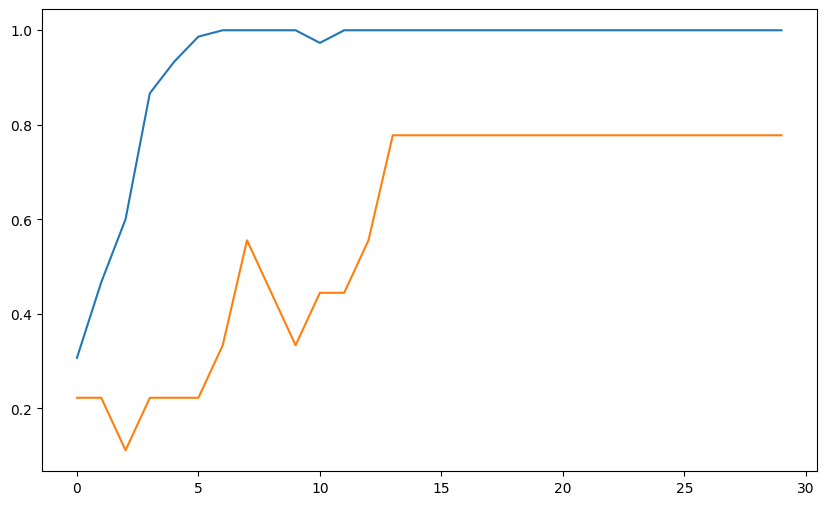

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.show()

In [37]:
label_encoder = LabelEncoder()
df["encoded_label"] = label_encoder.fit_transform(df["label"])
y = to_categorical(df["encoded_label"], num_classes=3)

In [38]:
def predict_sentiment(text):
    seq = pad_sequences(tokenizer.texts_to_sequences([clean_text(text)]),maxlen=200)
    prediction = model.predict(seq)[0]
    return label_encoder.inverse_transform([np.argmax(prediction)])[0]

In [50]:
print(predict_sentiment("Worst CSK"))
print(predict_sentiment("Not RCB"))
print(predict_sentiment("Lauda PKS"))

1/1 [==============================] - 0s 31ms/step
positive
1/1 [==============================] - 0s 25ms/step
neutral
1/1 [==============================] - 0s 27ms/step
positive
